# 자동 미분

In [1]:
import tensorflow as tf

In [4]:
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

In [5]:
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


# 자동 미분을 이용한 선형 회귀 구현

In [18]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [19]:
@tf.function
def hypothesis(x):
    return w*x + b

In [20]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [21]:
@tf.function
def mse_loss(y_pred, y):
    # 두 개의 차이값을 제곱을 해서 평균을 취한다.
    return tf.reduce_mean(tf.square(y_pred - y))

In [22]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [23]:
optimizer = tf.optimizers.SGD(0.01)

In [25]:
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(x)

        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)

    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w, b])

    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if i % 10 == 0:
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4f} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 9.6918 | b의 값 : 1.8943 | cost : 173.778076
epoch :  10 | w의 값 : 10.4979 | b의 값 : 1.9721 | cost : 1.348798
epoch :  20 | w의 값 : 10.5054 | b의 값 : 1.9251 | cost : 1.325962
epoch :  30 | w의 값 : 10.5126 | b의 값 : 1.8799 | cost : 1.304935
epoch :  40 | w의 값 : 10.5195 | b의 값 : 1.8366 | cost : 1.285576
epoch :  50 | w의 값 : 10.5261 | b의 값 : 1.7950 | cost : 1.267737
epoch :  60 | w의 값 : 10.5324 | b의 값 : 1.7551 | cost : 1.251314
epoch :  70 | w의 값 : 10.5385 | b의 값 : 1.7169 | cost : 1.236184
epoch :  80 | w의 값 : 10.5443 | b의 값 : 1.6801 | cost : 1.222252
epoch :  90 | w의 값 : 10.5499 | b의 값 : 1.6448 | cost : 1.209422
epoch : 100 | w의 값 : 10.5553 | b의 값 : 1.6110 | cost : 1.197604
epoch : 110 | w의 값 : 10.5605 | b의 값 : 1.5785 | cost : 1.186721
epoch : 120 | w의 값 : 10.5654 | b의 값 : 1.5474 | cost : 1.176698
epoch : 130 | w의 값 : 10.5702 | b의 값 : 1.5174 | cost : 1.167468
epoch : 140 | w의 값 : 10.5748 | b의 값 : 1.4887 | cost : 1.158965
epoch : 150 | w의 값 : 10.5791 | b의 값 : 1.4612 | cost : 

In [26]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35414  54.294846 59.60841  64.92198 ]


# 케라스로 구현하는 선형 회귀

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activarion은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 0s 477ms/step - loss: 4925.5566 - mse: 4925.5566
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 607.2151 - mse: 607.2151
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 75.8734 - mse: 75.8734
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 10.4939 - mse: 10.4939
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 2.4476 - mse: 2.4476
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.4557 - mse: 1.4557
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3318 - mse: 1.3318
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3147 - mse: 1.3147
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3108 - mse: 1.3108
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3085 - mse: 1.3085
Epoch 11/300
1/1 [==============================] - 0s 5ms/step

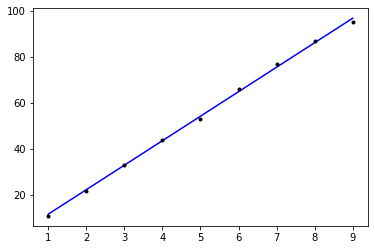

In [30]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [31]:
print(model.predict([9.5]))

[[102.130005]]
